In [4]:
%matplotlib inline 
#widget
import sys 
import xarray as xr
import numpy as np
import os 
import warnings
import yaml
from random import randint
import math
from datetime import datetime, timedelta

sys.path.append('/home/jvalenti/MOAD/analysis-jose/Source')
from OP_functions import *

In [5]:
config = ['/home/jvalenti/scratch/OParcels_runs/Parcels_outfall/outfall_runs.yaml']
path_runs = '/home/jvalenti/MOAD/results/Graham/' 
paths = path(0)
# Suppress FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)

path_NEMO = make_prefix(datetime(2019, 1, 1),paths['NEMO'])

jjii = xr.open_dataset('~/MOAD/grid/grid_from_lat_lon_mask999.nc')
finder(jjii,48,-123)

(193, 200)

In [6]:
coords = xr.open_dataset('/home/jvalenti/MOAD/grid/coordinates_seagrid_SalishSea201702.nc', decode_times=False)
mask = xr.open_dataset('/home/jvalenti/MOAD/grid2/mesh_mask202108_TDV.nc')

Text(0.5, 1.0, 'Salish Sea subregions')

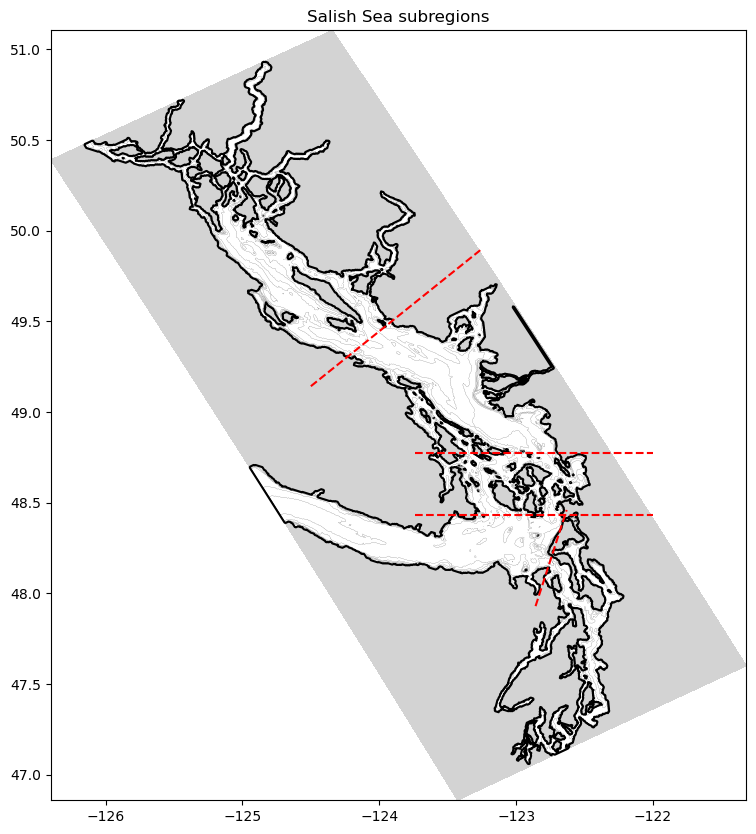

In [7]:
from matplotlib import pyplot as plt, animation, rc,colors
import cmocean
cm = cmocean.cm.dense

fig, ax = plt.subplots(1,1,figsize=(10, 10))

ax.contour(coords.nav_lon, coords.nav_lat, mask.mbathy[0,:,:],colors='k',linewidths=0.1)
ax.contourf(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
ax.contour(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')
#aa = ax.hist2d(DS.lon,DS.lat,100,cmap =cm,vmin=1e-5,vmax=2000)
ax.set_aspect(1/np.sin(np.deg2rad(49)))
Xline = np.linspace(-124.5,-122,100)
yline0 = (7/3)*Xline+334.6
yline1 = (20/33)*Xline+124.597
yline2 = np.zeros_like(Xline)+48.43
yline3 = np.zeros_like(Xline)+48.774
plt.plot(Xline[65:75],yline0[65:75],'r--')
plt.plot(Xline[:50],yline1[:50],'r--')
plt.plot(Xline[30:],yline2[30:],'r--')
plt.plot(Xline[30:],yline3[30:],'r--')

plt.title('Salish Sea subregions')

In [ ]:
def counting(DS,month,axs,fact=1):
    DSb = DS[DS.status==2]
    DSe = DS[DS.status==3]
    DSs = DS[DS.status==1]
    count = []
    countb = []
    counte = []
    depthb = []
    for i in range(ds.dims['obs']-1):
        times= np.min(DS.time)+i*6*3600
        count.append(len(DSs[DSs.time == times]))
        counte.append(len(DSe[DSe.time == times]))
        countb.append(len(DSb[DSb.time == times]))
        depthb.append(np.mean(DSs[DSs.time == times].z*DSs[DSs.time == times].fact))
    axs[0,0].plot(x2,np.array(count)/fact,label = month)
    axs[1,0].plot(x2,np.array(countb)/fact,'--',label = 'Beached')
    twin3.plot(x2,np.array(counte)/fact,label = ' Sedimented')
    axs[1,0].set_ylim([-1e4,6e4])
    twin3.set_ylim([-1e4,6e4])
    beached = [(c - countb[i-1])*4/(count[i-1]) for i,c in enumerate(countb)]#*4 to give the units in day-1
    sediment = [(c - counte[i-1])*4/(count[i-1]) for i,c in enumerate(counte)]
    beached = np.array(beached)
    for i,b in enumerate(beached):
        if b==0:
            beached[i]=(beached[i-1]+beached[i+1])/2
    sediment = np.array(sediment)
    for i,b in enumerate(sediment):
        if b==0:
            sediment[i]=(sediment[i-1]+sediment[i+1])/2
    axs[0,1].plot(moving_average(x2[1:],10),moving_average(1/beached[1:],10),'-',label = 'Beaching rate')
    # twin1.plot(x2,depthb,'--',la(bel = 'Avg Depth')
    axs[1,1].plot(moving_average(x[1:],10),moving_average(1/sediment[1:],10),label = 'Sedimentation rate')
    return #count,counte,countb,beached,sediment

In [ ]:
import pandas as pd
Point_At = pd.read_csv('Book1.csv')
Time=np.linspace(0,365,8017)

Source = pd.read_csv('Outfall_deploy.csv')
Source = Source.rename(columns={'Lat': 'lat', 'Lon': 'lon'})

In [8]:
runs = {'250 s':['alpha120190101.nc',2],'500 s':['alpha_1_jan.nc',2],'1,000 s':['alpha220190101.nc',2],'2,500 s':['Runs_alpha0220190101_.nc',1],'5,000 s':['Run_Enero20190101_.nc',2],'10,000 s':['Runs_alpha0520190101_.nc',1],'50,000 s':['Runs_alpha0120190101_.nc',1]}

months = {'Jan':['Run_Enero20190101_.nc',1],'Feb':['Run_Febrero20190201_.nc',32],'Mar':['Run_Marzo20190301_.nc',61],'Abr':['Run_Abril20190401_.nc',91],'Jun':['Run_Junio20190601_.nc',152],'Jul':['Run_Julio20190701_.nc',183],'Aug':['Run_Agosto20190801_.nc',214]}

sub_areas=['Puget','JdF','Rosario and Haro Straits','NSoG','CSSoG']
def cutting(data,area):
    if area=='Puget':
        data_new = data.loc[(data['lat']<48.43) & (data['lat']<(7/3)*data['lon']+334.6)]
    elif area=='JdF':
        data_new = pd.concat([data.loc[((data['lat']<48.43) & (data['lat']>(7/3)*data['lon']+334.6))],data.loc[((data['lat']>48.43) & (data['lat']<48.774) & (data['lon']<-124))]])
    elif area=='Haro':  
        data_new = data.loc[(data['lat']>48.43) & (data['lat']<48.774) & (data['lon']>-123.456) & (data['lon']<-123)]
    elif area=='Rosario and Haro Straits':  
        data_new = data.loc[(data['lat']>48.43) & (data['lat']<48.774) & (data['lon']>-124)]
    elif area=='NSoG':
        data_new = data.loc[(data['lat']>(20/33)*data['lon']+124.597)]
    elif area=='CSSoG': 
        data_new = data.loc[(data['lat']>48.774)&(data['lat']<(20/33)*data['lon']+124.597)]
    else:
        print('Unrecognized subarea') 
        data_new = data
    return data_new

In [ ]:
area = mask.e1t*mask.e2t
puget_area = area.where((coords.nav_lat<48.43) & (coords.nav_lat<(7/3)*coords.nav_lon+334.6)).sum()
haro2_area= area.where((coords.nav_lat>48.43) & (coords.nav_lat<48.774) & (coords.nav_lon>-124)).sum()
NSoG_area = area.where((coords.nav_lat>(20/33)*coords.nav_lon+124.597)).sum()
CSSog_area = area.where((coords.nav_lat>48.774)&(coords.nav_lat<(20/33)*coords.nav_lon+124.597)).sum()
jdf_area = area.where((coords.nav_lat<48.43) & (coords.nav_lat>(7/3)*coords.nav_lon+334.6)).sum() + area.where(((coords.nav_lat>48.43) & (coords.nav_lat<48.774) & (coords.nav_lon<-124))).sum()

#puget2_area = area.where((coords.nav_lat<48.43) & (coords.nav_lat<(7/3)*coords.nav_lon+334.6)&(coords.nav_lon> -122.766)).sum() #To trim Main Channel

sub_areas_area={'Puget':puget_area,'JdF':jdf_area,'Rosario and Haro Straits':haro2_area,'NSoG':NSoG_area,'CSSoG':CSSog_area}


In [12]:
puget_vol = mask.volume.where((coords.nav_lat<48.43) & (coords.nav_lat<(7/3)*coords.nav_lon+334.6)).sum()
haro2_vol= mask.volume.where((coords.nav_lat>48.43) & (coords.nav_lat<48.774) & (coords.nav_lon>-124)).sum()
NSoG_vol = mask.volume.where((coords.nav_lat>(20/33)*coords.nav_lon+124.597)).sum()
CSSog_vol = mask.volume.where((coords.nav_lat>48.774)&(coords.nav_lat<(20/33)*coords.nav_lon+124.597)).sum()
jdf_vol = mask.volume.where((coords.nav_lat<48.43) & (coords.nav_lat>(7/3)*coords.nav_lon+334.6)).sum() + mask.volume.where(((coords.nav_lat>48.43) & (coords.nav_lat<48.774) & (coords.nav_lon<-124))).sum()

#puget2_vol = mask.volume.where((coords.nav_lat<48.43) & (coords.nav_lat<(7/3)*coords.nav_lon+334.6)&(coords.nav_lon> -122.766)).sum() #To trim Main Channel

sub_areas_vol={'Puget':puget_vol,'JdF':jdf_vol,'Rosario and Haro Straits':haro2_vol,'NSoG':NSoG_vol,'CSSoG':CSSog_vol}

In [ ]:
# alpha = '5,000 s'
# mean = []
# ds = xr.open_dataset(path_runs+runs[alpha][0], decode_times=False)
# x = np.linspace(0,31,ds.dims['obs']-1)
# DS = ds.to_dataframe()
# DS = DS.dropna()
# DS = DS[DS.time>0]
# DS = DS[DS.status==3]
# vol = area.where((coords.nav_lat>49.25) & (coords.nav_lat<49.37)& (coords.nav_lon<-124.125)& (coords.nav_lon>-124.875)).sum()
# DSn = DS.loc[(DS['lat']>48.43) & (DS['lat']<48.774) & (DS['lon']>-124)]
# count = []
# timer = []
# for i in range(ds.dims['obs']-1):
#     times= np.min(DS.time)+i*6*3600
#     timer.append(times/86400)
#     count.append(len(DSn[DSn.time == times]))
# conc= np.array(count)*1e7*13.7/(vol.item()*runs[alpha][1])
# mean.append(np.mean(conc[-20:]))
# plt.plot(x,conc/timer,label=area)
# print(f'Average concentration for Ballenas Basin is {np.mean(conc[-20:]/timer[-20:])}')


In [ ]:
# alpha = '5,000 s'
# ds = xr.open_dataset(path_runs+runs[alpha][0], decode_times=False)
# x = np.linspace(0,31,ds.dims['obs']-1)
# DS = ds.to_dataframe()
# DS = DS.dropna()
# DS = DS[DS.time>0]
# DS = DS[DS.status==3]
# for area in sub_areas:
#     DSn = cutting(DS,area)
#     vol = sub_areas_area[area]
#     count = []
#     timer = []
#     for i in range(ds.dims['obs']-1):
#         times= np.min(DS.time)+i*6*3600
#         timer.append(times/86400)
#         count.append(len(DSn[DSn.time == times]))
#     conc= np.array(count)*1e7*13.7/(vol.item()*runs[alpha][1])
#     mean.append(np.mean(conc[-20:]))
#     plt.plot(x,conc/timer,label=area)
#     print(f'Average concentration for {area} is {np.mean(conc[-20:]/timer[-20:])}')
# plt.legend()

In [ ]:
means = []
for alpha in runs:
    ds = xr.open_dataset(path_runs+runs[alpha][0], decode_times=False)
    x = np.linspace(0,31,ds.dims['obs']-1)
    DS = ds.to_dataframe()
    DS = DS.dropna()
    DS = DS[DS.time>0]
    DS = DS[DS.status==3]
    mean=[]
    for area in sub_areas:
        DSn = cutting(DS,area)
        vol = sub_areas_area[area]
        count = []
        timer = []
        for i in range(ds.dims['obs']-1):
            times= np.min(DSn.time)+i*6*3600
            timer.append(times)
            count.append(len(DSn[DSn.time == times]))
        conc= np.array(count)*1e7*13.7/(vol.item()*runs[alpha][1])
        mean.append(np.mean(conc[-20:]))
        if alpha == '5,000 s':
            plt.plot(x,conc/timer,label=area)
        #print(f'Average concentration for {area} is {np.mean(conc[-20:])}')
    means.append(mean)
    if alpha == '5,000 s':
        plt.legend()

KeyboardInterrupt: 

In [ ]:
means_month = []
for alpha in months:
    ds = xr.open_dataset(path_runs+months[alpha][0], decode_times=False)
    x = np.linspace(0,31,ds.dims['obs']-1)
    DS = ds.to_dataframe()
    DS = DS.dropna()
    DS = DS[DS.time>0]
    DS = DS[DS.status==3]
    mean=[]
    for area in sub_areas:
        DSn = cutting(DS,area)
        vol = sub_areas_area[area]
        count = []
        timer = []
        for i in range(ds.dims['obs']-1):
            times= np.min(DSn.time)+i*6*3600
            timer.append(times)
            count.append(len(DSn[DSn.time == times]))
        conc= np.array(count)*1e7*13.7/(vol.item()*runs['5,000 s'][1])
        mean.append(np.mean(conc[-20:]))
    means_month.append(mean)

In [3]:
alphs = {'250 s':250,'500 s':500,'1,000 s':1000,'2,500 s':2500,'5,000 s':5000,'10,000 s':10000,'50,000 s':50000}
plt.plot(list(alphs.values()),means)
plt.title('Sedimentation rate per subregion vs alpha')
plt.plot([5000,5000,5000,5000,5000,5000],means_month)

NameError: name 'plt' is not defined

In [9]:
for alpha in months:
    print(alpha)

Jan
Feb
Mar
Abr
Jun
Jul
Aug


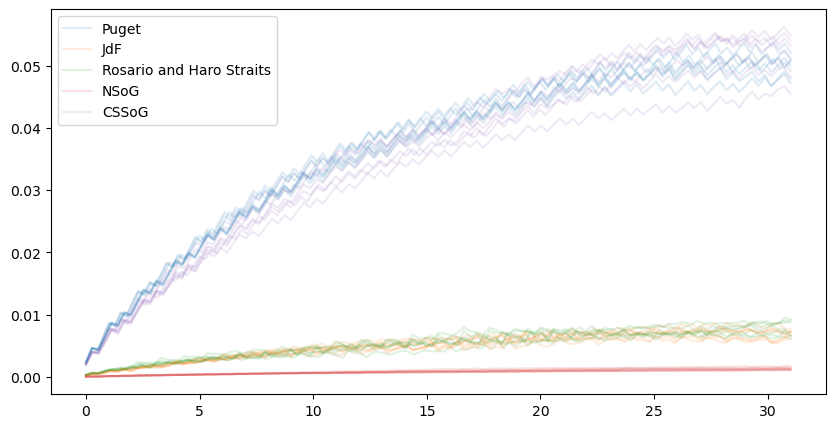

In [13]:
import seaborn as sns
fig = plt.figure(figsize = (10,5))
meansc = []
colores = sns.color_palette(None, 5)
for alpha in months:
    ds = xr.open_dataset(path_runs+months[alpha][0], decode_times=False)
    x = np.linspace(0,31,ds.dims['obs']-1)
    DS = ds.to_dataframe()
    DS = DS.dropna()
    DS = DS[DS.time>0]
    DS = DS[DS.status==1]
    mean=[]
    for iii,area in enumerate(sub_areas):
        DSn = cutting(DS,area)
        vol = sub_areas_vol[area]
        count = []
        timer = []
        for i in range(ds.dims['obs']-1):
            times= np.min(DSn.time)+i*6*3600
            timer.append(times)
            count.append(len(DSn[DSn.time == times]))
        conc= np.array(count)*5e6/(vol.item())
        mean.append(np.mean(conc[-20:]))
        if alpha == 'Jan':
            plt.plot(x,conc,label=area,c=colores[iii],alpha = 1/7)
        else:
            plt.plot(x,conc,c=colores[iii],alpha = 1/7)
        #print(f'Average concentration for {area} is {np.mean(conc[-20:])}')
    meansc.append(mean)
    if alpha == 'Aug':
        plt.legend()

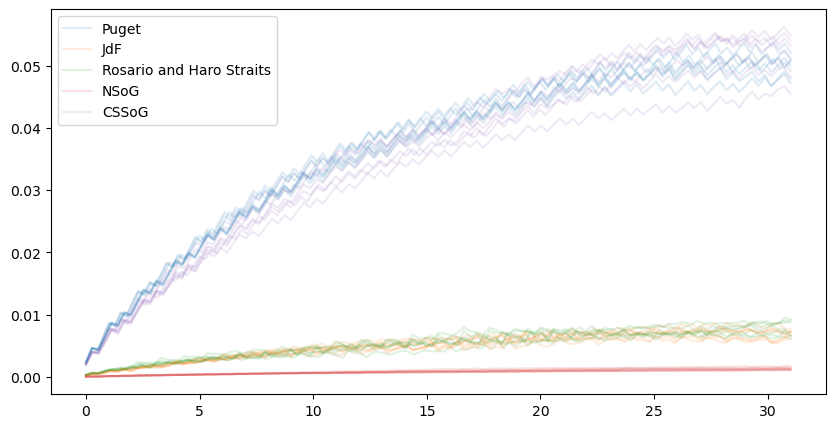

In [17]:
fig

In [ ]:
meansc_months = []
for alpha in months:
    ds = xr.open_dataset(path_runs+months[alpha][0], decode_times=False)
    x = np.linspace(0,31,ds.dims['obs']-1)
    DS = ds.to_dataframe()
    DS = DS.dropna()
    DS = DS[DS.time>0]
    DS = DS[DS.status==1]
    mean=[]
    for area in sub_areas:
        DSn = cutting(DS,area)
        vol = sub_areas_vol[area]
        count = []
        timer = []
        for i in range(ds.dims['obs']-1):
            times= np.min(DSn.time)+i*6*3600
            timer.append(times)
            count.append(len(DSn[DSn.time == times]))
        conc= np.array(count)*1e7*13.7/(vol.item()*runs['5,000 s'][1])
        mean.append(np.mean(conc[-20:]))    
    meansc_months.append(mean)
    

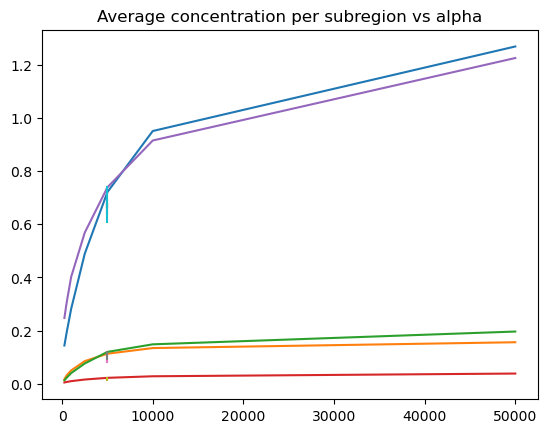

In [ ]:
plt.plot(list(alphs.values()),meansc)
plt.title('Average concentration per subregion vs alpha')
plt.plot([5000,5000,5000,5000,5000,5000],meansc_months)

(2000.0, 6000.0)

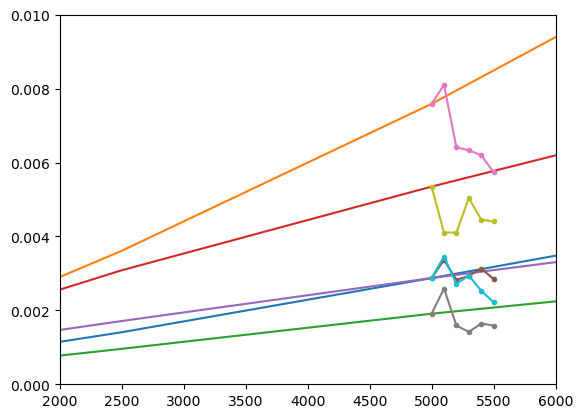

In [ ]:
plt.plot(list(alphs.values()),np.array(meansc)/np.array(means))
plt.plot([5000,5100,5200,5300,5400,5500],np.array(meansc_months)/np.array(means_month),'.-')
plt.ylim([0,0.01])
plt.xlim([2000,6000])

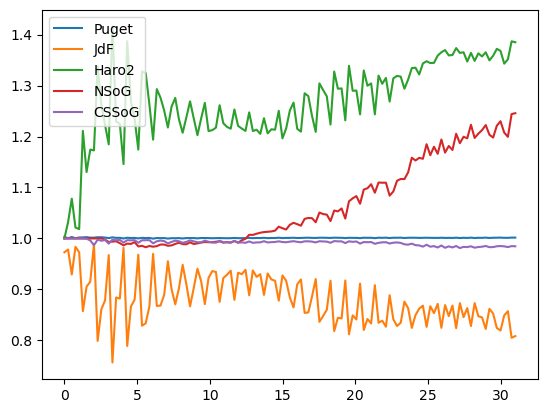

In [ ]:
Source['deploy']=round((Source.Population*250*10)/5e6,0)
alpha='5,000 s'
ds = xr.open_dataset(path_runs+runs[alpha][0], decode_times=False)
x = np.linspace(0,31,ds.dims['obs']-1)
DS = ds.to_dataframe()
DS = DS.dropna()
DS = DS[DS.time>0]
for area in sub_areas:
    DSn = cutting(DS,area)
    deploys = cutting(Source,area).deploy.sum()
    count = []
    depcount = []
    for i in range(ds.dims['obs']-1):
        times= np.min(DSn.time)+i*6*3600
        depcount.append((times/3600)//10)
        count.append(len(DSn[DSn.time == times]))
        exchange = (np.array(count)/(np.array(depcount)+1))/deploys
    plt.plot(x,exchange,label=area)
plt.legend()

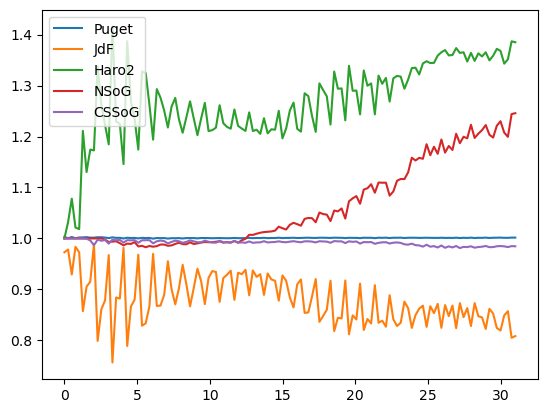

In [ ]:
Source['deploy']=round((Source.Population*250*10)/5e6,0)
alpha='5,000 s'
ds = xr.open_dataset(path_runs+runs[alpha][0], decode_times=False)
x = np.linspace(0,31,ds.dims['obs']-1)
DS = ds.to_dataframe()
DS = DS.dropna()
DS = DS[DS.time>0]
for area in sub_areas:
    DSn = cutting(DS,area)
    deploys = cutting(Source,area).deploy.sum()
    count = []
    depcount = []
    for i in range(ds.dims['obs']-1):
        times= np.min(DSn.time)+i*6*3600
        depcount.append((times/3600)//10)
        count.append(len(DSn[DSn.time == times]))
        exchange = (np.array(count)/(np.array(depcount)+1))/deploys
    plt.plot(x,exchange,label=area)
plt.legend()

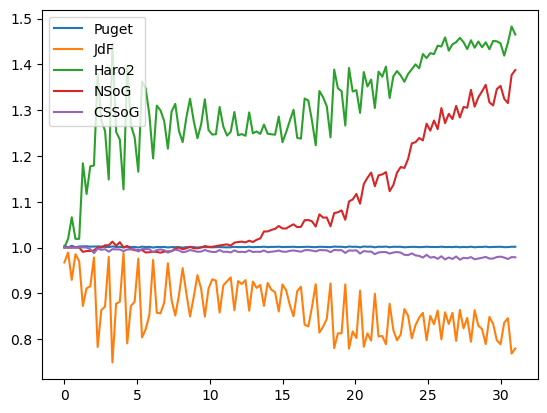

In [ ]:
Source['deploy']=round((Source.Population*250*10)/1e7,0)
alpha='50,000 s'
ds = xr.open_dataset(path_runs+runs[alpha][0], decode_times=False)
x = np.linspace(0,31,ds.dims['obs']-1)
DS = ds.to_dataframe()
DS = DS.dropna()
DS = DS[DS.time>0]
for area in sub_areas:
    DSn = cutting(DS,area)
    deploys = cutting(Source,area).deploy.sum()
    count = []
    depcount = []
    for i in range(ds.dims['obs']-1):
        times= np.min(DSn.time)+i*6*3600
        depcount.append((times/3600)//10)
        count.append(len(DSn[DSn.time == times]))
        exchange = (np.array(count)/(np.array(depcount)+1))/deploys
    plt.plot(x,exchange,label=area)
plt.legend()

In [ ]:
alphs = {'250 s':250,'500 s':500,'1,000 s':1000,'2,500 s':2500,'5,000 s':5000,'10,000 s':10000,'50,000 s':50000}

### This checks budget vs $\alpha$

In [ ]:
clist = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple']
meanll = []
stdll = []
for ii,alpha in enumerate(runs):
    ds = xr.open_dataset(path_runs+runs[alpha][0], decode_times=False)
    Source['deploy']=round((Source.Population*250*10)/(1e7/runs[alpha][1]),0)
    x = np.linspace(0,31,ds.dims['obs']-1)
    DS = ds.to_dataframe()
    DS = DS.dropna()
    DS = DS[DS.time>0]
    meanl = []
    stdl = []
    for jj, area in enumerate(sub_areas):
        DSn = cutting(DS,area)
        deploys = cutting(Source,area).deploy.sum()
        count = []
        depcount = []
        timer = []
        for i in range(ds.dims['obs']-1):
            times= np.min(DSn.time)+i*6*3600
            timer.append(times/86400)
            depcount.append((times/3600)//10)
            count.append(len(DSn[DSn.time == times]))
        count = ((np.array(count)*1e7/runs[alpha][1]-(np.array(depcount)+1)*deploys*1e7/runs[alpha][1])/(np.array(timer)))[-40:]
        meanl.append(np.mean(count)) #exchange per second
        stdl.append(np.std(count))
    meanll.append(meanl)
    stdll.append(stdl)

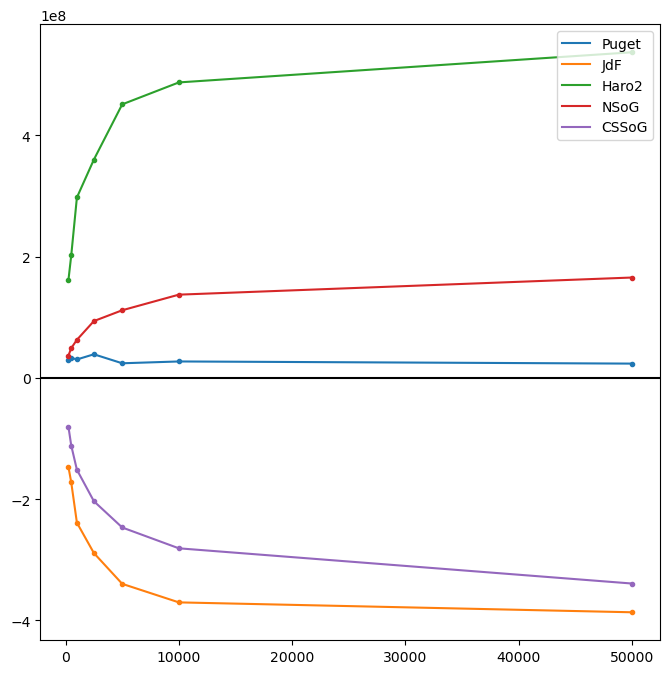

In [ ]:
fig,axs = plt.subplots(1,1,figsize=(8,8))
plt.plot(list(alphs.values()),meanll,linestyle='-',marker='.')
legend_lines = [plt.Line2D([0], [0], color=clist[0], linestyle='-'),plt.Line2D([0], [0], color=clist[1], linestyle='-'),plt.Line2D([0], [0], color=clist[2], linestyle='-'),plt.Line2D([0], [0], color=clist[3], linestyle='-'),plt.Line2D([0], [0], color=clist[4], linestyle='-')]
plt.axhline(y=0,color='black')
plt.legend(legend_lines,sub_areas, loc = 'upper right')

In [ ]:
clist = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple']
meanll = []
stdll = []
for ii,alpha in enumerate(months):
    ds = xr.open_dataset(path_runs+months[alpha][0], decode_times=False)
    Source['deploy']=round((Source.Population*250*10)/(5e6),0)
    x = np.linspace(0,31,ds.dims['obs']-1)
    DS = ds.to_dataframe()
    DS = DS.dropna()
    DS = DS[DS.time>0]
    meanl = []
    stdl = []
    for jj, area in enumerate(sub_areas):
        DSn = cutting(DS,area)
        deploys = cutting(Source,area).deploy.sum()
        count = []
        depcount = []
        timer = []
        for i in range(ds.dims['obs']-1):
            times= np.min(DSn.time)+i*6*3600
            timer.append(times)
            depcount.append((times/3600)//10)
            count.append(len(DSn[DSn.time == times]))
        count = ((np.array(count)*5e6-(np.array(depcount)+1)*deploys*5e6)/(np.array(timer)))
        meanl.append(np.mean(count)) #exchange per second
        stdl.append(np.std(count))
    meanll.append(meanl)
    stdll.append(stdl)

In [ ]:
np.sum(np.array(meanll).T,axis=0)

array([ 4.54747351e-13, -5.11590770e-13,  1.70530257e-13,  1.25055521e-12,
       -9.09494702e-13,  4.54747351e-13])

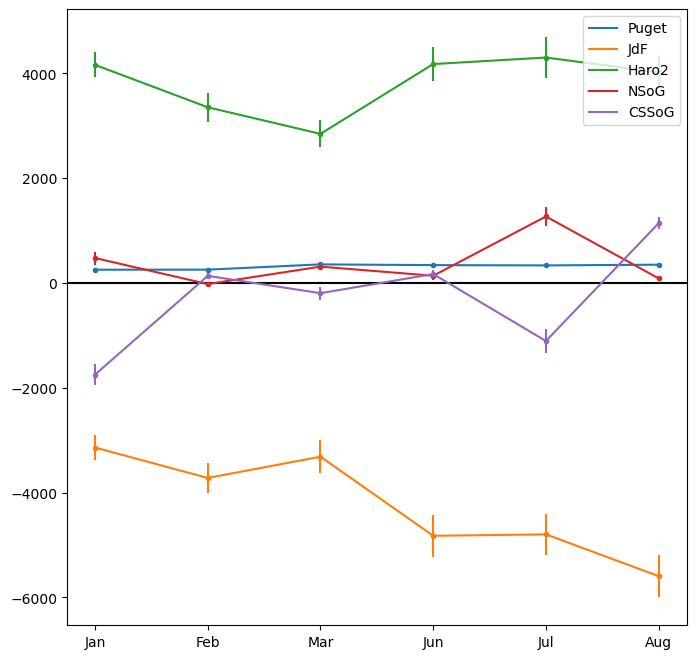

In [ ]:
fig,axs = plt.subplots(1,1,figsize=(8,8))
for i,area in enumerate(sub_areas):
    plt.errorbar(list(months.keys()),np.array(meanll).T[i],np.array(stdll).T[i]/len(stdll[0]),linestyle='-',marker='.')
legend_lines = [plt.Line2D([0], [0], color=clist[0], linestyle='-'),plt.Line2D([0], [0], color=clist[1], linestyle='-'),plt.Line2D([0], [0], color=clist[2], linestyle='-'),plt.Line2D([0], [0], color=clist[3], linestyle='-'),plt.Line2D([0], [0], color=clist[4], linestyle='-')]
plt.axhline(y=0,color='black')
plt.legend(legend_lines,sub_areas, loc = 'upper right')

In [ ]:
np.array(meanll).T[0]*13.7

array([3466.42136883, 3478.64083237, 4856.94857663, 4662.21611603,
       4591.1638094 , 4777.09947575])

In [ ]:
sub_areas=['Puget','JdF','Haro','NSoG','CSSoG']

In [ ]:
clist = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple']
meanll = []
stdll = []
for ii,alpha in enumerate(months):
    ds = xr.open_dataset(path_runs+months[alpha][0], decode_times=False)
    Source['deploy']=round((Source.Population*250*10)/(5e6),0)
    x = np.linspace(0,31,ds.dims['obs']-1)
    DS = ds.to_dataframe()
    DS = DS.dropna()
    DS = DS[DS.time>0]
    meanl = []
    stdl = []
    for jj, area in enumerate(sub_areas):
        DSn = cutting(DS,area)
        deploys = cutting(Source,area).deploy.sum()
        count = []
        depcount = []
        timer = []
        for i in range(ds.dims['obs']-1):
            times= np.min(DSn.time)+i*6*3600
            timer.append(times)
            depcount.append((times/3600)//10)
            count.append(len(DSn[DSn.time == times]))
        count = ((np.array(count)*5e6-(np.array(depcount)+1)*deploys*5e6)/(np.array(timer)))
        meanl.append(np.mean(count)) #exchange per second
        stdl.append(np.std(count))
    meanll.append(meanl)
    stdll.append(stdl)

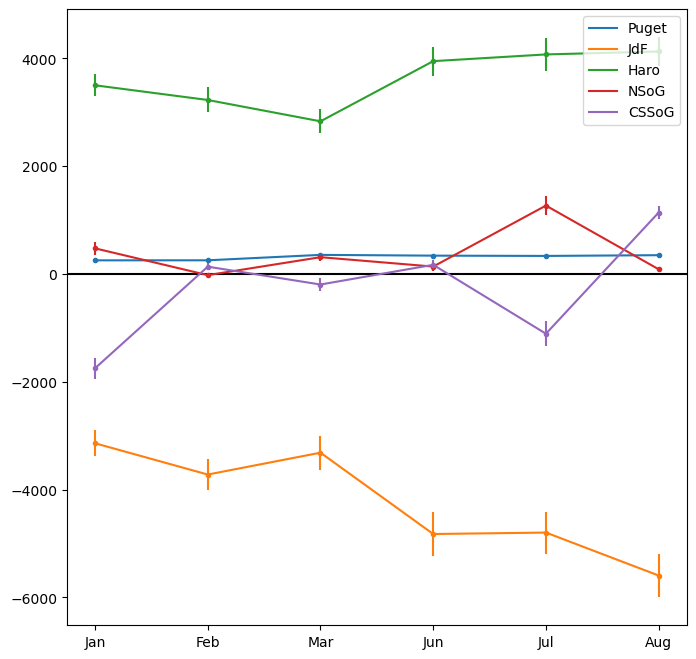

In [ ]:
fig,axs = plt.subplots(1,1,figsize=(8,8))
for i,area in enumerate(sub_areas):
    plt.errorbar(list(months.keys()),np.array(meanll).T[i],np.array(stdll).T[i]/len(stdll[0]),linestyle='-',marker='.')
legend_lines = [plt.Line2D([0], [0], color=clist[0], linestyle='-'),plt.Line2D([0], [0], color=clist[1], linestyle='-'),plt.Line2D([0], [0], color=clist[2], linestyle='-'),plt.Line2D([0], [0], color=clist[3], linestyle='-'),plt.Line2D([0], [0], color=clist[4], linestyle='-')]
plt.axhline(y=0,color='black')
plt.legend(legend_lines,sub_areas, loc = 'upper right')

Parker's 2021 flow

In [ ]:
meane = 40.9e3
df = 4.7e3
exch= np.linspace(meane+df,meane-df,8)
exch
#exch= list(exch[:3])+list(exch[-3:])
#np.array(meanll).T[0]*13.7/(np.array(exch))

array([45600.        , 44257.14285714, 42914.28571429, 41571.42857143,
       40228.57142857, 38885.71428571, 37542.85714286, 36200.        ])

In [ ]:
ii,jj = finder(jjii,48.145078973929365, -122.75094025918668)

In [ ]:
lim=10

for month in months:
    conc1 = np.load(path_runs+months[month][0].split('.')[0]+'.npy')*13.7
    limdep = mask.gdept_0[0,:,0,0].values
    limn = np.where(limdep>lim)[0][0]-1
    zdep = round(limdep[limn],2)
    print(f'checking for depth = {zdep}')
    admirup = conc1[:limn,int(ii/3),:]
    admirdeep = conc1[limn:,int(ii/3),:]
    weightsup = mask.e3t_0[0,:limn,int(ii/3),::3].values/np.sum(mask.e3t_0[0,:limn,int(ii/3),::3].values,axis=0)
    weightsdeep = mask.e3t_0[0,limn:,int(ii/3),::3].values/np.sum(mask.e3t_0[0,limn:,int(ii/3),::3].values,axis=0)
    #print(f'average concentration in {month} of upper {zdep}m {np.mean(admirup[mask.tmask[0,:lim,ii,::3]==1])}')
    #print(f'average concentration deeper than {zdep}m {np.mean(admirdeep[mask.tmask[0,lim:,ii,::3]==1])}')
    print(f'Difference in {month} upper vs lower {-np.average(admirup[mask.tmask[0,:limn,ii,::3]==1],weights=weightsup[mask.tmask[0,:limn,ii,::3]==1])+np.average(admirdeep[mask.tmask[0,limn:,ii,::3]==1],weights=weightsdeep[mask.tmask[0,limn:,ii,::3]==1])}')

checking for depth = 9.5
Difference in Jan upper vs lower 0.008828478460783773
checking for depth = 9.5
Difference in Feb upper vs lower 0.012019580577336708
checking for depth = 9.5
Difference in Mar upper vs lower 0.04418745082499492
checking for depth = 9.5
Difference in Jun upper vs lower 0.12019632437078806
checking for depth = 9.5
Difference in Jul upper vs lower 0.05280445116623003
checking for depth = 9.5
Difference in Aug upper vs lower 0.010593266971856585


In [ ]:
month = {'Jan':1,'Feb':2,'Mar':3,'Jun':6,'Jul':7,'Aug':8}
for m in month:
    v = xr.open_dataset('/results/SalishSea/month-avg.201905/'+'SalishSea_1m_20190'+str(month[m])+'_20190'+str(month[m])+'_grid_V.nc', decode_times=False).vomecrty
    conc1 = np.load(path_runs+months[m][0].split('.')[0]+'.npy')*13.7
    admir = conc1[:,int(ii/3),:]
    admirout = admir[v[0,:,int(ii/3),::3]>0]
    admirin= admir[v[0,:,int(ii/3),::3]<0]

    weights = mask.e3t_0[0,:,int(ii/3),::3].values/np.sum(mask.e3t_0[0,:,int(ii/3),::3].values,axis=0)
    weightsin = weights[v[0,:,int(ii/3),::3]<0]
    weightsout = weights[v[0,:,int(ii/3),::3]>0]
    #print(f'average concentration in {month} of upper {zdep}m {np.mean(admirup[mask.tmask[0,:lim,ii,::3]==1])}')
    #print(f'average concentration deeper than {zdep}m {np.mean(admirdeep[mask.tmask[0,lim:,ii,::3]==1])}')
    print(f'Difference in {m} upper vs lower {np.average(admirin,weights=weightsin)+np.average(admirout,weights=weightsout)}')

Difference in Jan upper vs lower 0.01838382150202309
Difference in Feb upper vs lower 0.015560438154672085
Difference in Mar upper vs lower 0.029773328510979656
Difference in Jun upper vs lower 0.006782790973645338
Difference in Jul upper vs lower 0.02504564985799839
Difference in Aug upper vs lower 0.015739647896920093


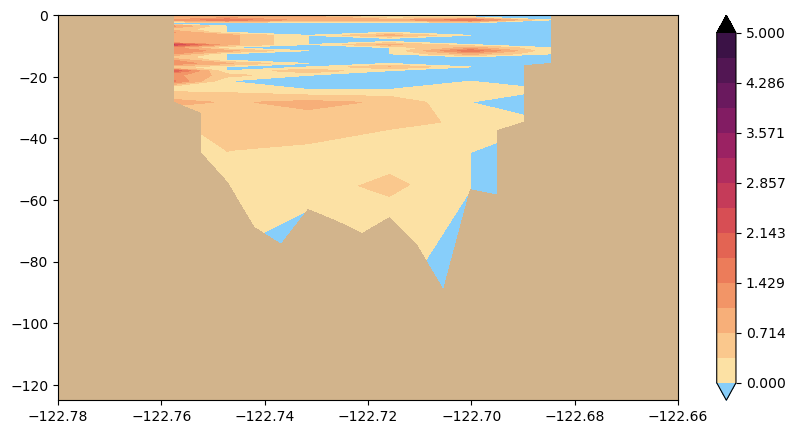

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(10,5))
Ni = 3
levels = np.linspace(0, 5, 15)
Lon,Depth = np.meshgrid(coords.nav_lon[ii,::Ni],mask.gdept_0[0,:,ii,0])
Lon2,Depth = np.meshgrid(coords.nav_lon[ii,:],mask.gdept_0[0,:,ii,0])
#Lon,Depth = np.meshgrid(coords.nav_lat[::Ni,jj],mask.gdept_0[0,:,0,jj])
ac = plt.contourf(Lon,-mask.gdept_0[0,:,ii,::Ni],conc1[:,int(ii/3),:],levels=levels,cmap=cmocean.cm.matter,extend='both')
#ac = plt.contourf(Lon,-mask.gdept_0[0,:,::Ni,jj],conc_winter[:,:,int(jj/3)],levels=levels,cmap=cmocean.cm.matter,extend='both')
ax.contourf(Lon2,-mask.gdept_0[0,:,ii,:], mask.tmask[0,:,ii,:], levels=[-0.01, 0.01], colors='tan')
ac.cmap.set_over('black')
ac.cmap.set_under('lightskyblue')
plt.ylim([-125,0])
plt.xlim([-122.78, -122.66])
plt.colorbar(ac)